In [2]:
import geopandas as gpd
import os

# Set the path to your GeoJSON folder
geojson_folder = 'AlgiersGeoJSON/'

# List all GeoJSON files in the folder
geojson_files = [f for f in os.listdir(geojson_folder) if f.endswith('.geojson')]

# Initialize an empty GeoDataFrame to store the data
gdf = gpd.GeoDataFrame()

# Iterate through each GeoJSON file and append its data to the GeoDataFrame
for file in geojson_files:
    file_path = os.path.join(geojson_folder, file)
    data = gpd.read_file(file_path)
    gdf = gdf.append(data, ignore_index=True)

# Now, gdf contains all the data from the GeoJSON folder
print(gdf.head())


                                            geometry
0  POLYGON ((3.06240 36.75151, 3.06253 36.75146, ...
1  POLYGON ((3.12979 36.73308, 3.13955 36.73191, ...
2  POLYGON ((3.11645 36.70607, 3.11216 36.70687, ...
3  POLYGON ((3.01147 36.77089, 3.01022 36.76826, ...
4  POLYGON ((3.01230 36.73370, 3.01519 36.73342, ...


C:\Users\Amir\AppData\Local\Temp\ipykernel_6880\1999744396.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(data, ignore_index=True)


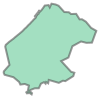

In [49]:
gdf['geometry'].iloc[32]

## Population:

In [45]:
import geopandas as gpd

# Read the GeoJSON file for Algiers province
algiers_province_gdf = gpd.read_file("AlgiersGeoJSON/Algiers.geojson") # Thanks to Meriem Baziz

In [46]:
import pandas as pd

# Read the CSV file with XYZ data
# xyz_data_df = pd.read_csv("dza_pd_2020_1km_UNadj_ASCII_XYZ/dza_pd_2020_1km_UNadj_ASCII_XYZ.csv")
xyz_data_df = pd.read_csv("dza_pd_2020_1km_ASCII_XYZ/dza_pd_2020_1km_ASCII_XYZ.csv") # Thanks to dr. Kheira Lakhdri
# https://data.humdata.org/dataset/worldpop-population-density-for-algeria

xyz_data_gdf = gpd.GeoDataFrame(xyz_data_df, 
                                geometry=gpd.points_from_xy(xyz_data_df.X, xyz_data_df.Y),
                                crs="EPSG:4326")

In [47]:
# Perform a spatial join
joined_data = gpd.sjoin(xyz_data_gdf, algiers_province_gdf, how="inner", op="within")

# 'joined_data' now contains only the points that fall within Algiers province
joined_data

C:\Users\Amir\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,X,Y,Z,geometry,index_right
6892,2.952917,36.812083,3108.984375,POINT (2.95292 36.81208),52
6893,2.961250,36.812083,3139.970215,POINT (2.96125 36.81208),52
6894,2.969583,36.812083,6193.280762,POINT (2.96958 36.81208),52
6895,2.977917,36.812083,6047.211914,POINT (2.97792 36.81208),52
6896,2.986250,36.812083,4747.733398,POINT (2.98625 36.81208),52
...,...,...,...,...,...
23557,2.961250,36.595417,267.377808,POINT (2.96125 36.59542),17
23560,2.986250,36.595417,1085.680908,POINT (2.98625 36.59542),17
23561,2.994583,36.595417,2366.410400,POINT (2.99458 36.59542),17
23562,3.002917,36.595417,1432.877075,POINT (3.00292 36.59542),17


In [48]:
joined_data.Z.sum()

6357957.825546265

* Another idea which could be dynamic is "using macro trends api and and another api that provides total population then we calculate correction rate (since the macro trends data is a little off) with that we can calculate the expected population for each state.